# Waiter Tips Analysis and Prediction

Tipping waiters for serving food depends on many factors like the type of restaurant, how many
people you are with, how much amount you pay as your bill, etc.

## 1. Problem
> The goal of this project is to predict the tips given to waiters in a restaurant based on various factors such as total bill, gender, number of people, day of the week, and other demographic details.

## 2. Data 
The dataset `tips.csv` contains the following features:

- total_bill: Total bill in dollars including taxes.
- tip: Tip given to waiters in dollars (target variable).
- sex: Gender of the person paying the bill.
- smoker: Whether the person smoked or not.
- day: Day of the week.
- time: Lunch or dinner.
- size: Number of people at a table.

## 3. Model Evaluation

The model to be used is **Linear Regression** to predict the tips based on the provided features. The evaluation will be done using metrics such as:

- Mean Absolute Error (MAE): To measure the average magnitude of errors in the predictions.
- R-squared (R²): To determine the proportion of the variance for the dependent variable that's explained by the independent variables.
- Mean Squared Error (MSE): To quantify the difference between actual and predicted tips.


### Preparing the tools

In [23]:
import pandas as pd 
import numpy as np 

# Import the visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Models & Preprocessing tools 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

### Import the dataset

In [64]:
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Check for any missing values

In [66]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [67]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [69]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### EDA 
Let's do some Exploratory Data Analysis

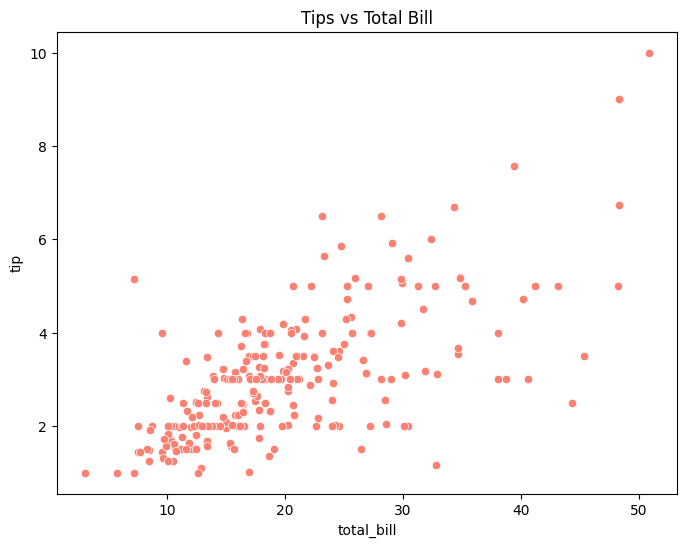

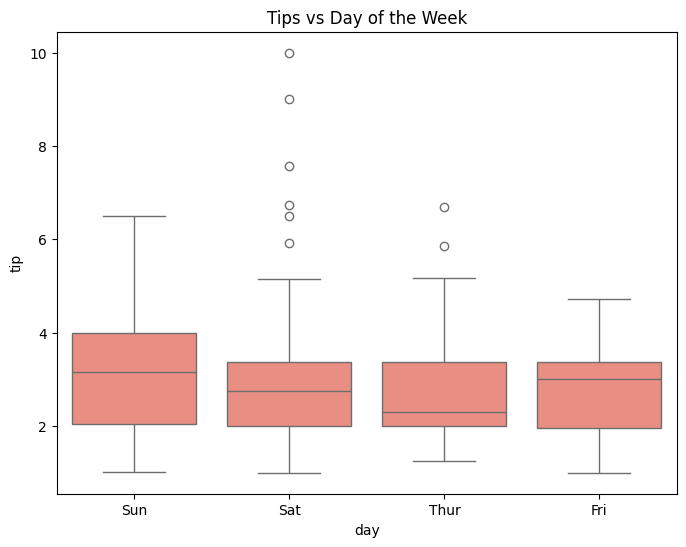

In [70]:
# Tips vs. Total Bill
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', color='salmon')
plt.title('Tips vs Total Bill')
plt.show()


# Tips vs Day of the Week
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day', y='tip',color="salmon")
plt.title('Tips vs Day of the Week')
plt.show()

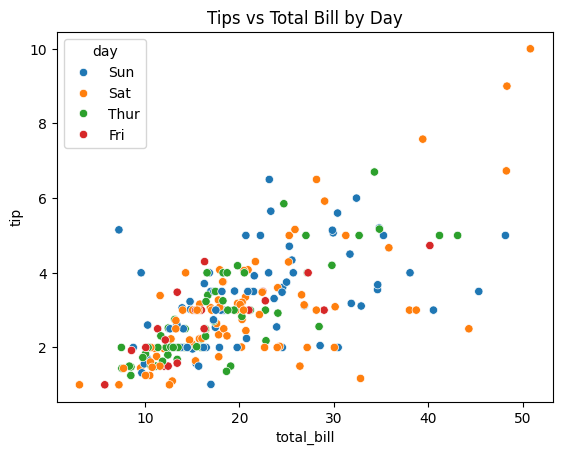

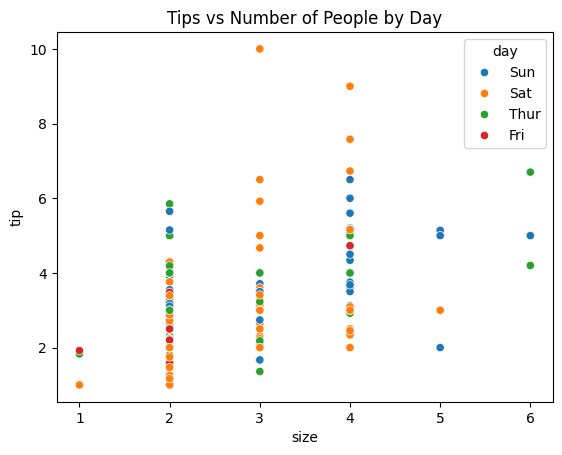

In [71]:
# Tips given to waiters according to total bill, number of people, and day of the week
sns.scatterplot(x='total_bill', y='tip', hue='day', data=df)
plt.title("Tips vs Total Bill by Day")
plt.show()

sns.scatterplot(x='size', y='tip', hue='day', data=df)
plt.title("Tips vs Number of People by Day")
plt.show()

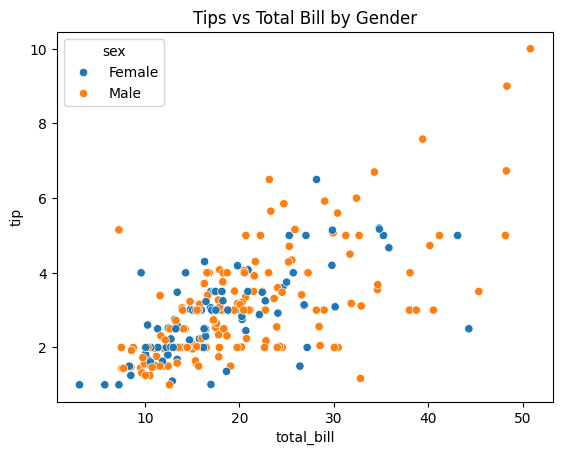

In [72]:
# Tips based on total bill, number of people, and gender
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.title("Tips vs Total Bill by Gender")
plt.show()

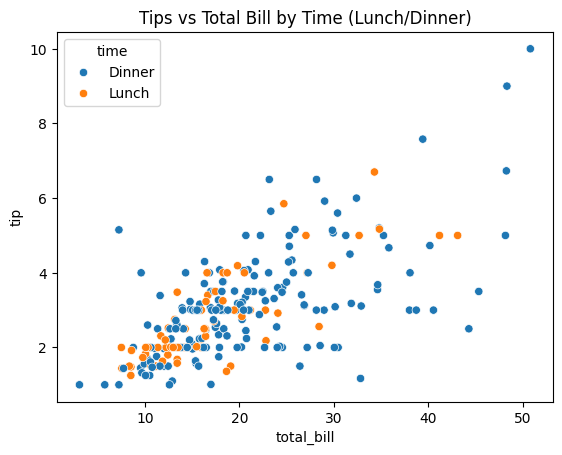

In [73]:
sns.scatterplot(x='total_bill', y='tip', hue='time', data=df)
plt.title("Tips vs Total Bill by Time (Lunch/Dinner)")
plt.show()

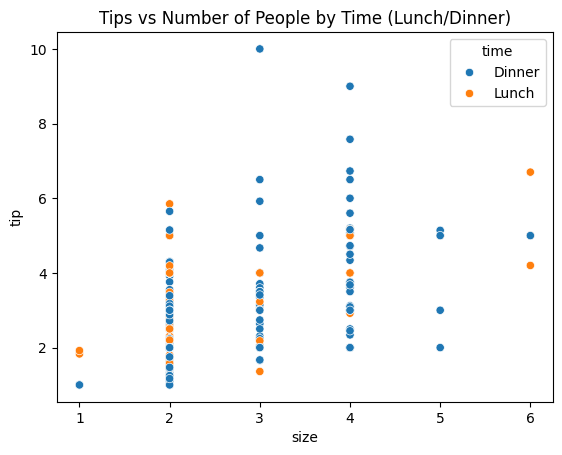

In [74]:
# Tips vs Number of People by Time (Lunch/Dinner)
sns.scatterplot(x='size', y='tip', hue='time', data=df)
plt.title("Tips vs Number of People by Time (Lunch/Dinner)")
plt.show()

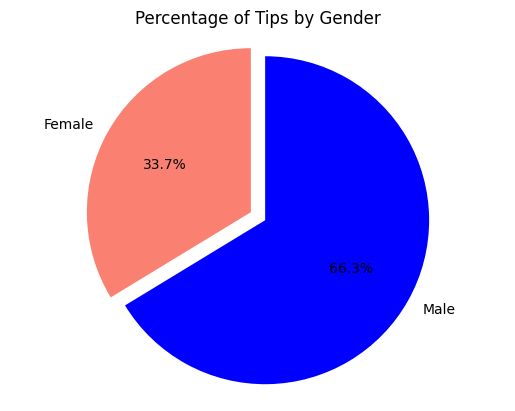

In [75]:
# Tips by gender
# Aggregate tips by gender
gender_tip_sum = df.groupby('sex')['tip'].sum()

# Define labels for gender (assuming 0 = Female, 1 = Male in the encoded data)
labels = ['Female', 'Male']

# Plot the pie chart
plt.pie(gender_tip_sum, labels=labels, autopct='%1.1f%%', colors=['salmon', 'blue'], startangle=90, explode=(0.1, 0))
plt.title("Percentage of Tips by Gender")
plt.axis('equal')  
plt.show()

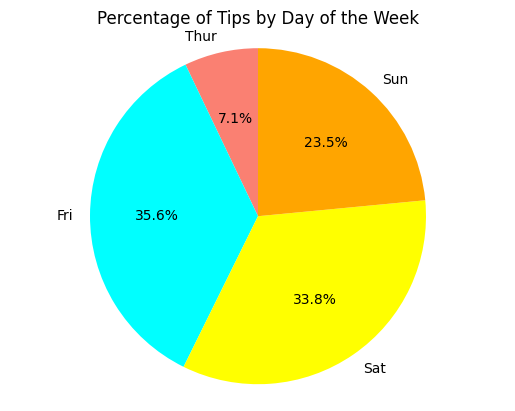

In [76]:
# Tips by day of the week (which day gives the most tips?)
# Aggregate tips by day of the week
day_tip_sum = df.groupby('day')['tip'].sum()

# Define labels (assuming the days are already encoded or you use appropriate labels)
labels = ['Thur', 'Fri', 'Sat', 'Sun']  # Modify based on actual days in your dataset

# Plot the pie chart
plt.pie(day_tip_sum, labels=labels, autopct='%1.1f%%', colors=['salmon', 'cyan', 'yellow', 'orange'], startangle=90)
plt.title("Percentage of Tips by Day of the Week")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.show()

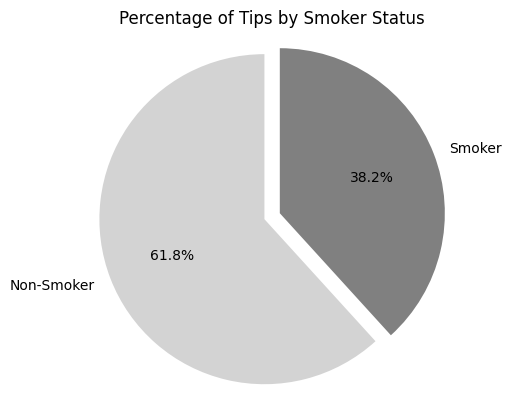

In [77]:
# Does a smoker tip more or a non-smoker?
# Aggregate tips by smoker status
smoker_tip_sum = df.groupby('smoker')['tip'].sum()

# Define labels for smoker status
labels = ['Non-Smoker', 'Smoker']

# Plot the pie chart
plt.pie(smoker_tip_sum, labels=labels, autopct='%1.1f%%', colors=['lightgrey', 'grey'], startangle=90, explode=(0.1, 0))
plt.title("Percentage of Tips by Smoker Status")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.show()

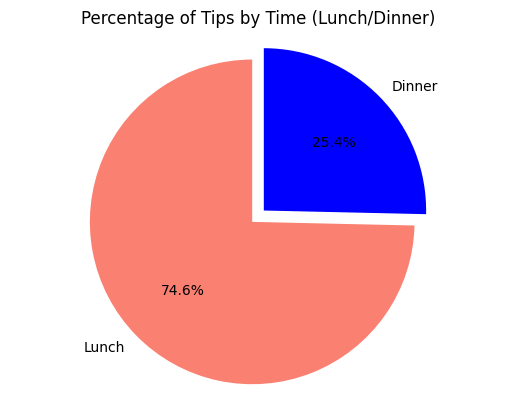

In [78]:
time_tip_sum = df.groupby('time')['tip'].sum()

# Define labels for lunch and dinner
labels = ['Lunch', 'Dinner']

# Plot the pie chart
plt.pie(time_tip_sum, labels=labels, autopct='%1.1f%%', colors=['salmon', 'blue'], startangle=90, explode=(0.1, 0))
plt.title("Percentage of Tips by Time (Lunch/Dinner)")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.show()

### Data Preprocessing

Now we have visualized our data, Let's move on to pre-process our `categorical features` into `numerical features`.

In [79]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['day'] = le.fit_transform(df['day'])
df['time'] = le.fit_transform(df['time'])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


### Modelling 

After the preprocessing part is done, we can now go and split or data into training and testing datasets and then train our model. 

In [81]:
X = df.drop(columns='tip')  # Features
y = df['tip']               # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 
y_pred = model.predict(X_test)
y_pred

array([2.98575218, 1.94061325, 3.90398163, 3.84498032, 2.1680261 ,
       2.60582699, 3.65155039, 2.31090817, 2.50534068, 2.3509249 ,
       2.83515653, 2.13537228, 2.1389529 , 2.2854076 , 1.84415015,
       3.13003355, 2.9775778 , 3.14430016, 2.63638097, 5.76225288,
       3.51539752, 3.30404608, 2.24355298, 2.02073543, 3.09625338,
       2.26938652, 2.0815602 , 3.27434496, 3.14662672, 6.60403271,
       4.93408016, 1.65891577, 3.2774898 , 2.83817187, 2.91871607,
       3.8815044 , 2.0688538 , 5.47790762, 2.37480412, 3.06180769,
       2.11094147, 2.50259602, 3.36699633, 2.29479093, 1.95079059,
       0.94708728, 1.89400456, 3.11987541, 1.8813126 ])

### Model Evaluation

In [84]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.6948129686287711
R-squared Score: 0.4441368826121931


### Make Predictions

In [86]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [89]:
sample_input = np.array([[24.50, 1, 0, 0, 2, 4]])  # {total_bill:24.50, "sex":1, "smoker":0, "day":0, "time":1, "size":4}
sample_pred = model.predict(sample_input)
print("Sample Prediction (Tip):", sample_pred)

Sample Prediction (Tip): [4.03539557]


c:\Users\HP\Documents\ML Internship Projects\Tips\venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

